In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
y_train[0] 

9

In [5]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

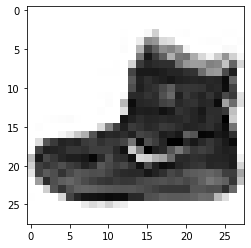

In [6]:
plt.imshow(X_train[0],cmap = 'Greys')

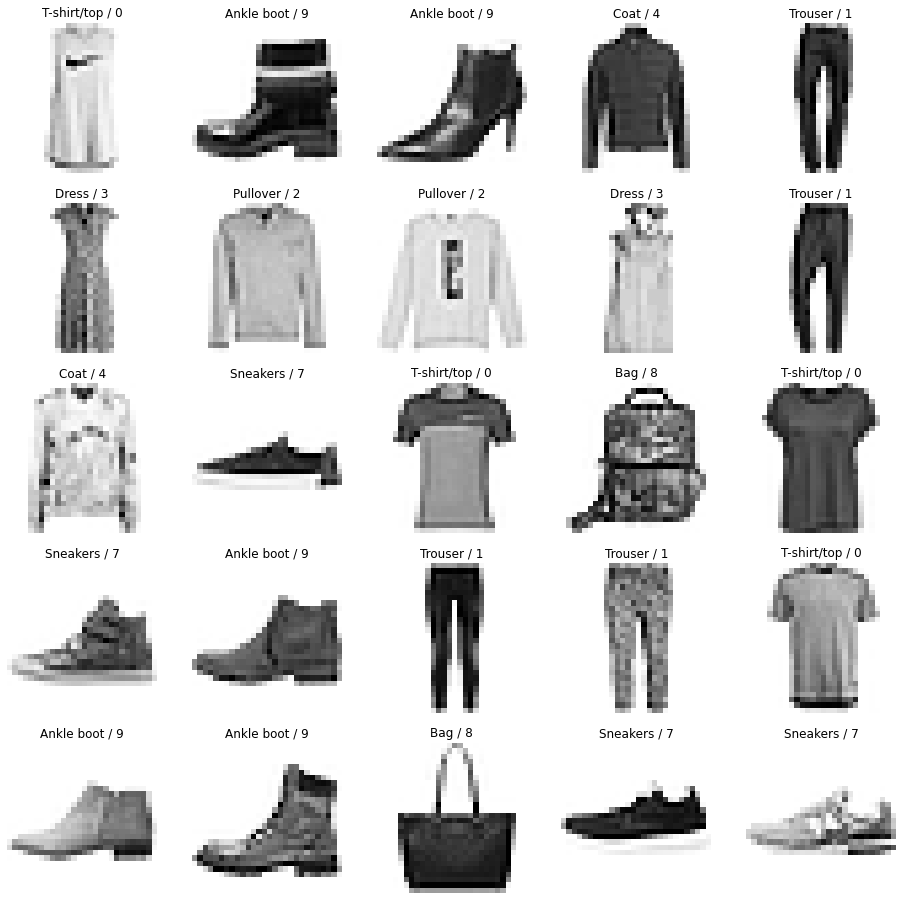

In [8]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [9]:
X_train.ndim 

3

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train  = np.expand_dims(X_train,-1)
X_test  = np.expand_dims(X_test,-1)

In [12]:
X_train.ndim 

4

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 2020)

In [16]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [17]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [18]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

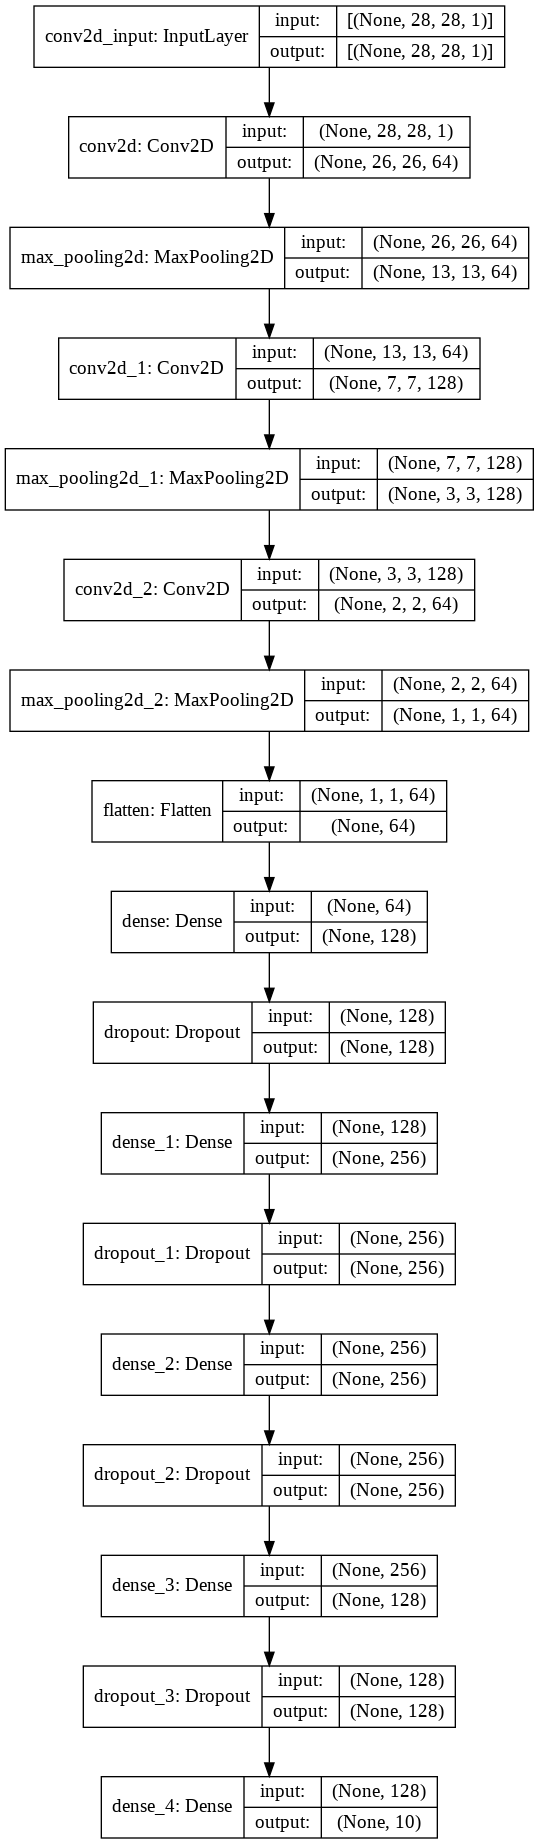

In [19]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs = 10,batch_size = 512,verbose = 1, validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 35s 25ms/step - loss: 1.6458 - accuracy: 0.3593 - val_loss: 0.6650 - val_accuracy: 0.7433
Epoch 2/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6572 - accuracy: 0.7427 - val_loss: 0.4823 - val_accuracy: 0.8111
Epoch 3/10
94/94 [==============================] - 2s 18ms/step - loss: 0.5251 - accuracy: 0.8021 - val_loss: 0.4433 - val_accuracy: 0.8361
Epoch 4/10
94/94 [==============================] - 2s 18ms/step - loss: 0.4655 - accuracy: 0.8210 - val_loss: 0.3882 - val_accuracy: 0.8548
Epoch 5/10
94/94 [==============================] - 2s 18ms/step - loss: 0.4030 - accuracy: 0.8539 - val_loss: 0.3497 - val_accuracy: 0.8730
Epoch 6/10
94/94 [==============================] - 2s 18ms/step - loss: 0.3525 - accuracy: 0.8720 - val_loss: 0.3261 - val_accuracy: 0.8788
Epoch 7/10
94/94 [==============================] - 2s 18ms/step - loss: 0.3204 - accuracy: 0.8852 - val_loss: 0.3097 - val_accuracy: 0.8868
Epoch 8/10
9

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.9000


[0.2900990843772888, 0.8999999761581421]

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

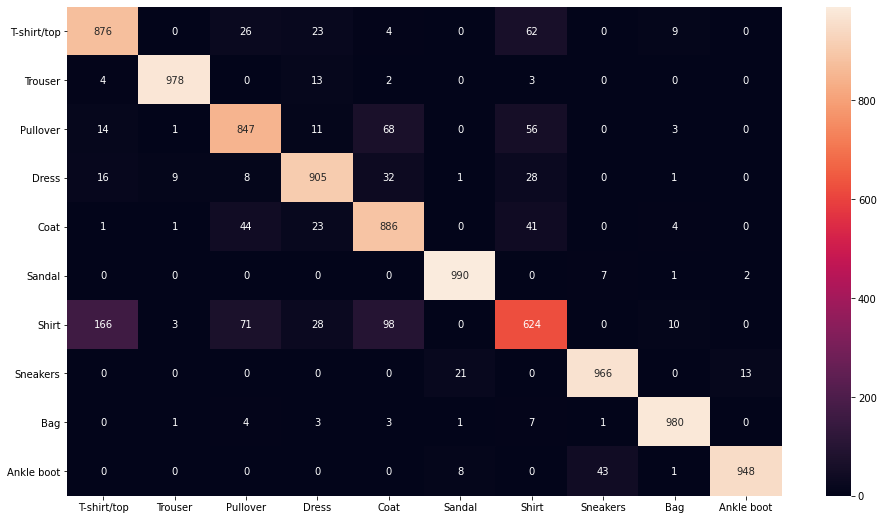

In [26]:

from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

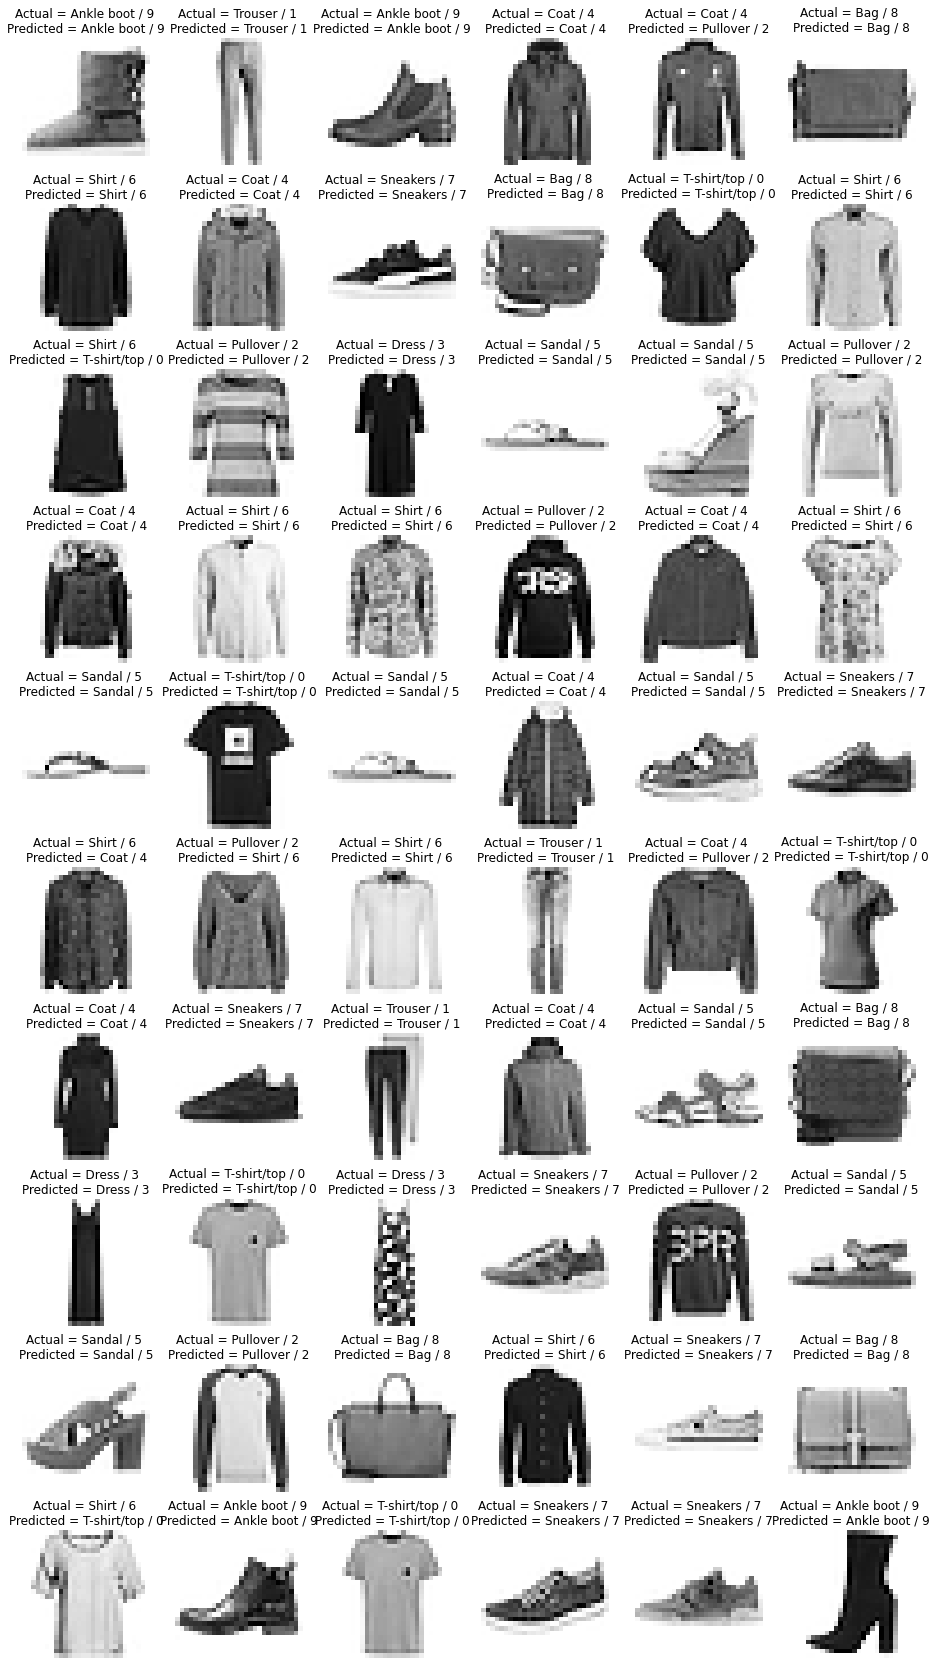

In [27]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))